In [1]:
import pandas as pd
import scanpy as sc

# Đọc dữ liệu chính (DATA)
d = pd.read_csv("data.csv")

# Trích xuất thông tin gene từ cột đầu tiên
genes = d.iloc[:, 0].astype(str).str.split("_").str[1]

# Loại bỏ các gene trùng lặp
unique_genes_mask = ~genes.duplicated()
d = d[unique_genes_mask]
genes = genes[unique_genes_mask]

# Đặt tên hàng là gene
d.index = genes
d = d.iloc[:, 1:]  # Bỏ cột đầu tiên (đã xử lý thông tin gene)

# Tạo metadata (ANNOTATIONS)
cell_types = d.columns.str.split("__").str[1]
ann = pd.DataFrame({"cell_type1": cell_types}, index=d.columns)

# Tạo đối tượng AnnData từ dữ liệu
adata = sc.AnnData(X=d.T)  # Chuyển vị vì Scanpy yêu cầu hàng là cells, cột là genes
adata.var_names = d.index  # Đặt tên genes
adata.obs = ann  # Thêm metadata cho cells

# Lưu dữ liệu thành file .h5ad
adata.write("li.h5ad")

In [2]:
adata.obs

,cell_type1
RHA015__A549__turquoise,A549
RHA016__A549__turquoise,A549
RHA017__A549__turquoise,A549
RHA018__A549__turquoise,A549
RHA028__A549__turquoise,A549
...,...
RHC2502__H1_B2__brown,H1_B2
RHC2503__H1_B2__brown,H1_B2
RHC2504__H1_B2__brown,H1_B2
RHC2505__H1_B2__brown,H1_B2


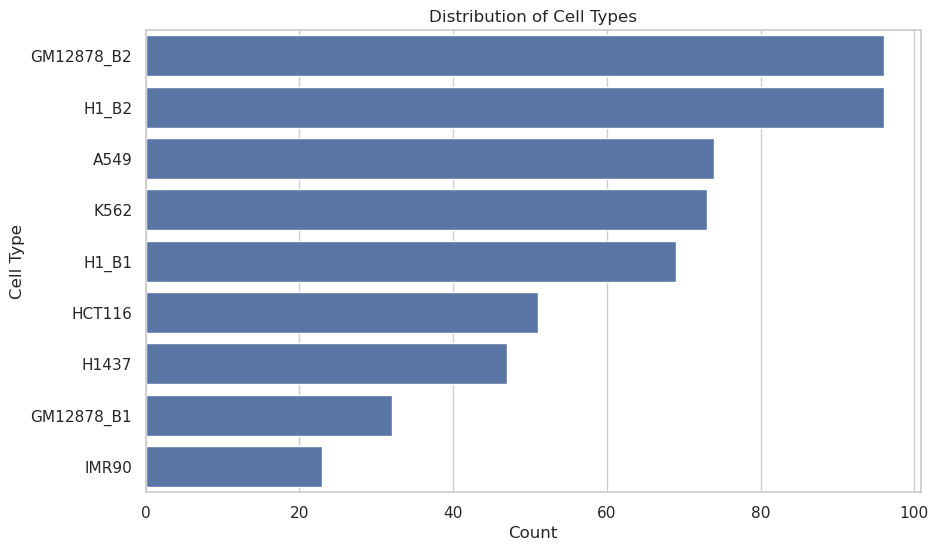

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=adata.obs, y="cell_type1", order=adata.obs['cell_type1'].value_counts().index)
plt.title("Distribution of Cell Types")
plt.xlabel("Count")
plt.ylabel("Cell Type")
plt.show()